Universidad del Valle de Guatemala

Data Science

Fernanda Esquivel - 21542

Sofi Lam - 21548

In [12]:
!pip install ydata_profiling
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import anderson
from sklearn.preprocessing import MultiLabelBinarizer
from ydata_profiling import ProfileReport
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# Exploración de los datos

In [13]:
datos = pd.read_csv('risk_factors_cervical_cancer.csv')
datos.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


# Tipo de las variables
1. Age: cuantitativa discreta
2. Number.of.sexual.partners: cuantitativa discreta
3. First.sexual.intercourse: cuantitativa discreta
4. Num.of.pregnancies: cuantitativa discreta
5. Smokes: categórica
6. Smokes(years): cuantitativa cuantitativa
7. Smokes.packs.per.year: cuantitativa discreta
8. Hormonal.Contraceptives: categórica
9. Hormonal.Contraceptives.years: cuantitativa discreta
10. IUD: categórica
11. IUD.years: cuantitativa continua
12. STDs: categórica
13. STD.number: cuantitativa discreta
14. STD.condylomatosis: categórica
15. STD.cervical.condylomatosis: categórica
16. STD.vaginal.condylomatosis: categórica
17. STDs.vulvo.perineal.condylomatosis: categórica
18. STDs.syphilis: categórica
19. STDs.pelvic.inflammatory.disease: categórica
20. STDs.genital.herpes: categórica
21. STDs.molluscum.contagiosum: categórica
22. STDs.AIDS: categórica
23. STDs.HIV: categórica
24. STDs.Hepatitis.B: categórica
25. STDs.HPV: categórica
26. STDs.Number.of.diagnosis: cuantitativa discreta
27. STDs.Time.since.first.diagnosis: cuantitativa continua
28. STDs.Time.since.last.diagnosis: cuantitativa continua
29. Dx.Cancer: categórica
30. Dx.CIN: categórica
31. Dx.HPV: categórica
32. Dx: categórica
33. Hinselmann: categórica
34. Schiller: categórica
35. Citology: categórica
37. Biopsy: categórica


Por lo que tenemos un total de 24 variables categóricas, 8 variables cuantitativas discretas y 4 variables cuantitativas continuas.


In [14]:
datos.dtypes

Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object
STDs:HIV  

Después de ver los tipos que tiene cada variable vemos que hay algunas de las variables que son cuantitativas que tienen el tipo object, tales como Number of secual partners, First sexual intercourse, num of pregnancies, entre otras.

Además, vemos que las variables categóricas son del tipo "object", esto se debe a que se categorizaron en binario siendo "0" el no y "1" el sí, pero hay algunos datos que tienen "?", indicando a que no se sabe con exactitud.





In [15]:
datos.describe()

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000,858.000000
mean,26.820513,0.087413,0.020979,0.010490,0.020979,0.027972,0.040793,0.086247,0.051282,0.064103
std,8.497948,0.302545,0.143398,0.101939,0.143398,0.164989,0.197925,0.280892,0.220701,0.245078
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
profile = ProfileReport(datos)
profile

Render HTML: 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]


De esto podemos observar que hay 20 filas que están duplicadas, y que hay varias variables que tienen una alta correlación entre ellas, como Hormonal Contraceptives con Hormonal Contraceptives years. Y Hormonal Contraceptives con cada una de STDs, entre otras.


# 4. Aísle las variables numéricas de las categóricas, haga un análisis de correlación entre las mismas.

In [23]:
import seaborn as sns

In [24]:
#Identificar y separar las variables númericas y categóricas
numericalVars = ['Age', 'Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies', 
                'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives (years)', 'IUD (years)', 
                'STDs (number)', 'STDs: Number of diagnosis', 'STDs: Time since first diagnosis', 
                'STDs: Time since last diagnosis']

categoricalVars = [col for col in datos.columns if col not in numericalVars]

#Convertir el símbolo "?" a NaN y convertir a tipos numéricos apropiados
datos[numericalVars] = datos[numericalVars].replace('?', np.nan)

#Convertir columnas a float
datos[numericalVars] = datos[numericalVars].astype(float)

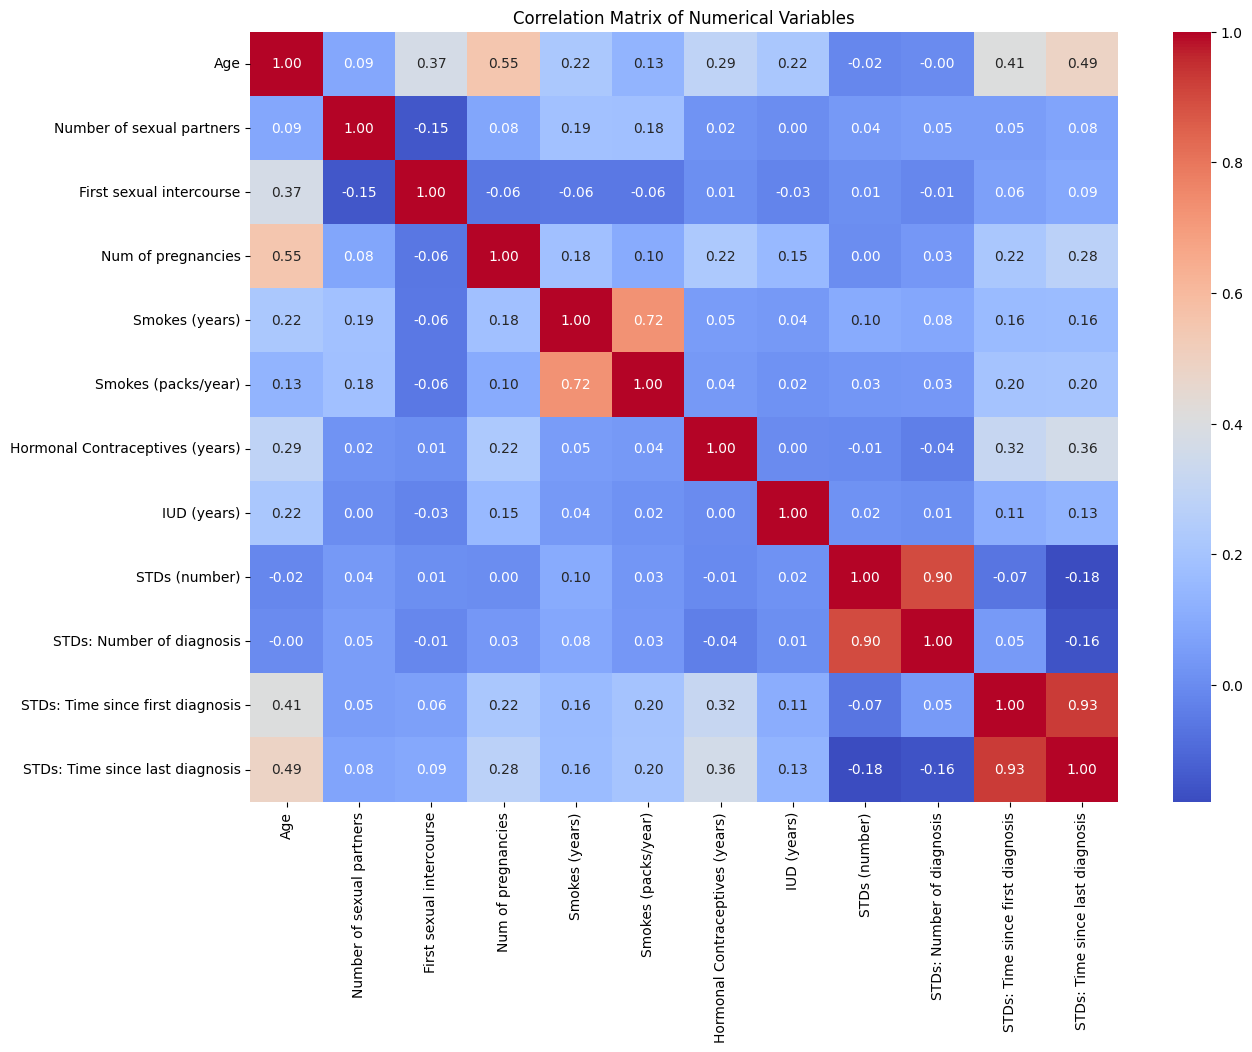

In [26]:
#Calcular la matriz de correlación para las variables numéricas
correlationMatrix = datos[numericalVars].corr()

#Mostrar la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# 5. Utilice las variables categóricas, haga tablas de frecuencia, proporción, gráficas de barras o cualquier otra técnica que le permita explorar los datos.

In [27]:
#Función para crear tablas de frecuencia y gráficos de barras
def analyzeCategoricalVars(df, categoricaVars):
    for var in categoricaVars:
        plt.figure(figsize=(10, 6))
        freq_table = df[var].value_counts(dropna=False)
        prop_table = df[var].value_counts(normalize=True, dropna=False)
        
        #Imprimir tablas de frecuencia y proporción
        print(f'Frequency Table for {var}:\n{freq_table}\n')
        print(f'Proportion Table for {var}:\n{prop_table}\n')
        
        #Crear gráfico de barras
        sns.barplot(x=freq_table.index, y=freq_table.values, palette='viridis')
        plt.title(f'Bar Plot of {var}')
        plt.ylabel('Frequency')
        plt.xlabel(var)
        plt.xticks(rotation=90)
        plt.show()

Frequency Table for Smokes:
Smokes
0.0    722
1.0    123
?       13
Name: count, dtype: int64

Proportion Table for Smokes:
Smokes
0.0    0.841492
1.0    0.143357
?      0.015152
Name: proportion, dtype: float64



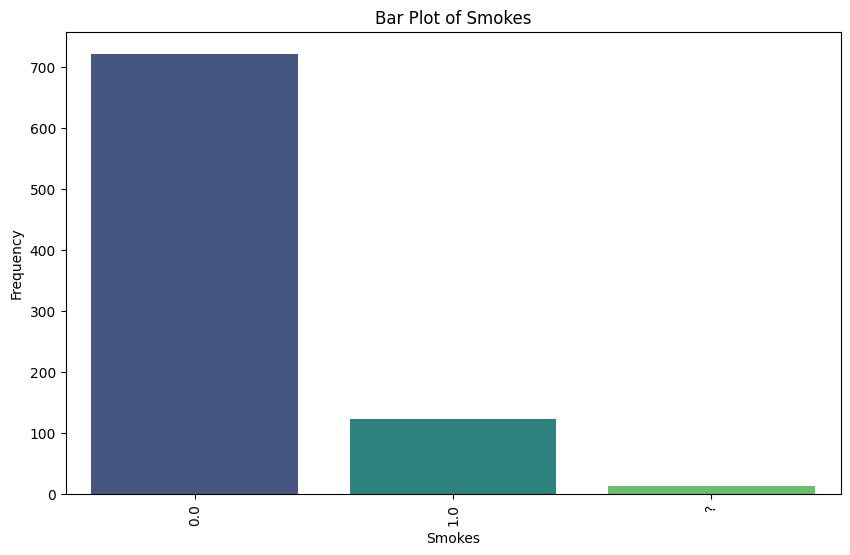

Frequency Table for Hormonal Contraceptives:
Hormonal Contraceptives
1.0    481
0.0    269
?      108
Name: count, dtype: int64

Proportion Table for Hormonal Contraceptives:
Hormonal Contraceptives
1.0    0.560606
0.0    0.313520
?      0.125874
Name: proportion, dtype: float64



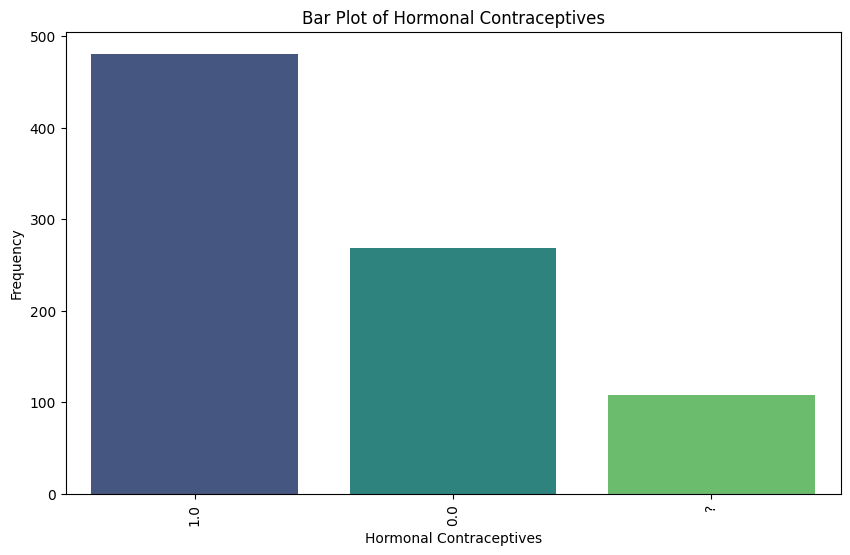

Frequency Table for IUD:
IUD
0.0    658
?      117
1.0     83
Name: count, dtype: int64

Proportion Table for IUD:
IUD
0.0    0.766900
?      0.136364
1.0    0.096737
Name: proportion, dtype: float64



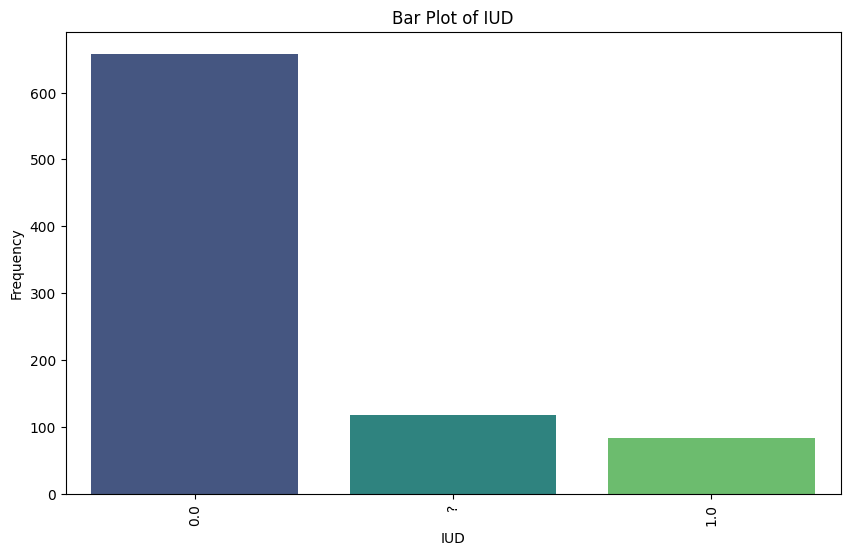

Frequency Table for STDs:
STDs
0.0    674
?      105
1.0     79
Name: count, dtype: int64

Proportion Table for STDs:
STDs
0.0    0.785548
?      0.122378
1.0    0.092075
Name: proportion, dtype: float64



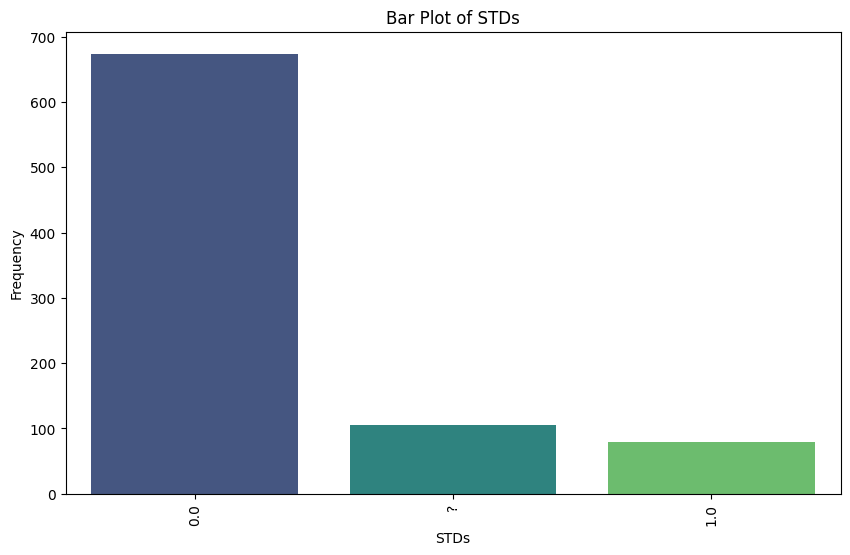

Frequency Table for STDs:condylomatosis:
STDs:condylomatosis
0.0    709
?      105
1.0     44
Name: count, dtype: int64

Proportion Table for STDs:condylomatosis:
STDs:condylomatosis
0.0    0.826340
?      0.122378
1.0    0.051282
Name: proportion, dtype: float64



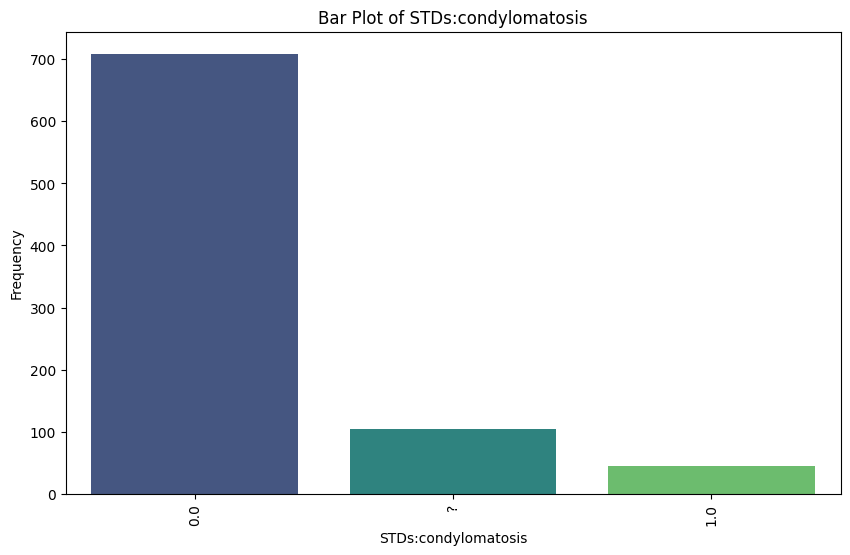

Frequency Table for STDs:cervical condylomatosis:
STDs:cervical condylomatosis
0.0    753
?      105
Name: count, dtype: int64

Proportion Table for STDs:cervical condylomatosis:
STDs:cervical condylomatosis
0.0    0.877622
?      0.122378
Name: proportion, dtype: float64



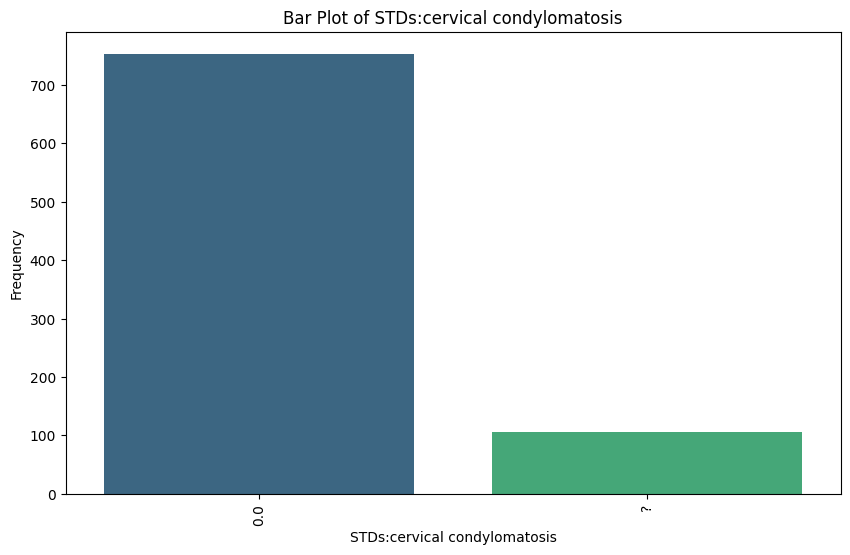

Frequency Table for STDs:vaginal condylomatosis:
STDs:vaginal condylomatosis
0.0    749
?      105
1.0      4
Name: count, dtype: int64

Proportion Table for STDs:vaginal condylomatosis:
STDs:vaginal condylomatosis
0.0    0.872960
?      0.122378
1.0    0.004662
Name: proportion, dtype: float64



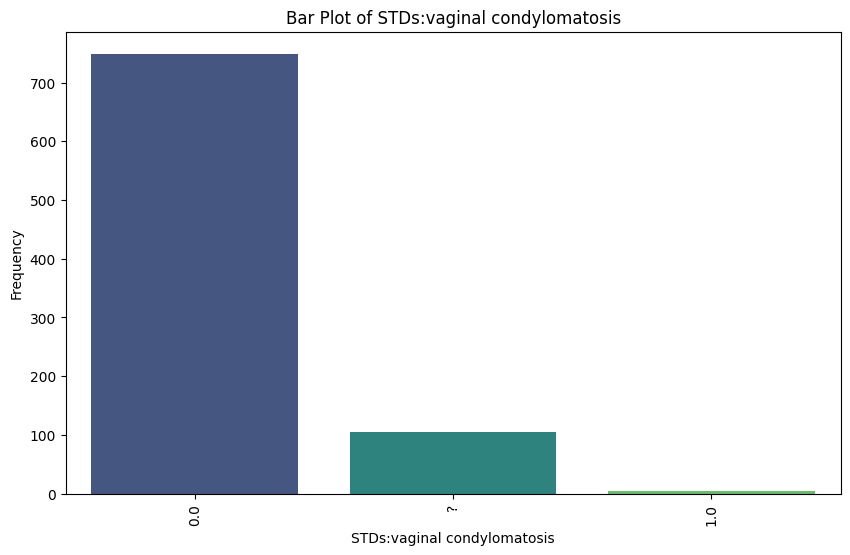

Frequency Table for STDs:vulvo-perineal condylomatosis:
STDs:vulvo-perineal condylomatosis
0.0    710
?      105
1.0     43
Name: count, dtype: int64

Proportion Table for STDs:vulvo-perineal condylomatosis:
STDs:vulvo-perineal condylomatosis
0.0    0.827506
?      0.122378
1.0    0.050117
Name: proportion, dtype: float64



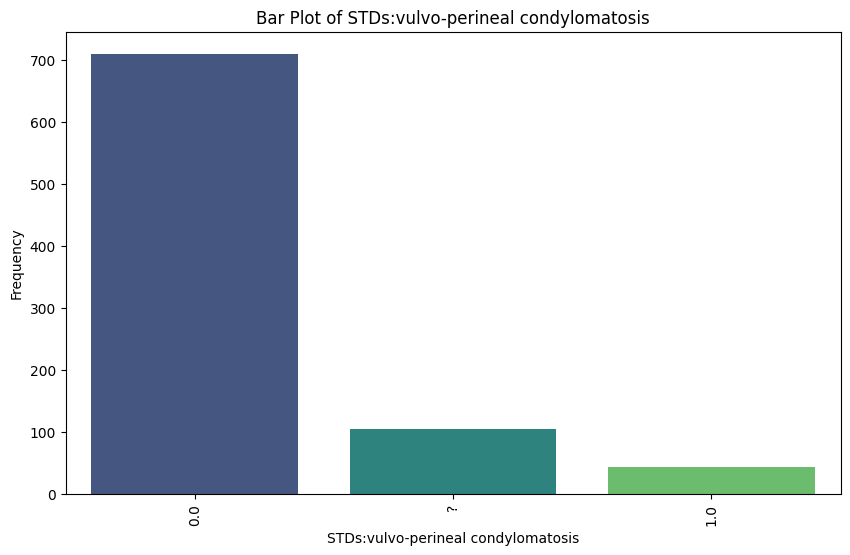

Frequency Table for STDs:syphilis:
STDs:syphilis
0.0    735
?      105
1.0     18
Name: count, dtype: int64

Proportion Table for STDs:syphilis:
STDs:syphilis
0.0    0.856643
?      0.122378
1.0    0.020979
Name: proportion, dtype: float64



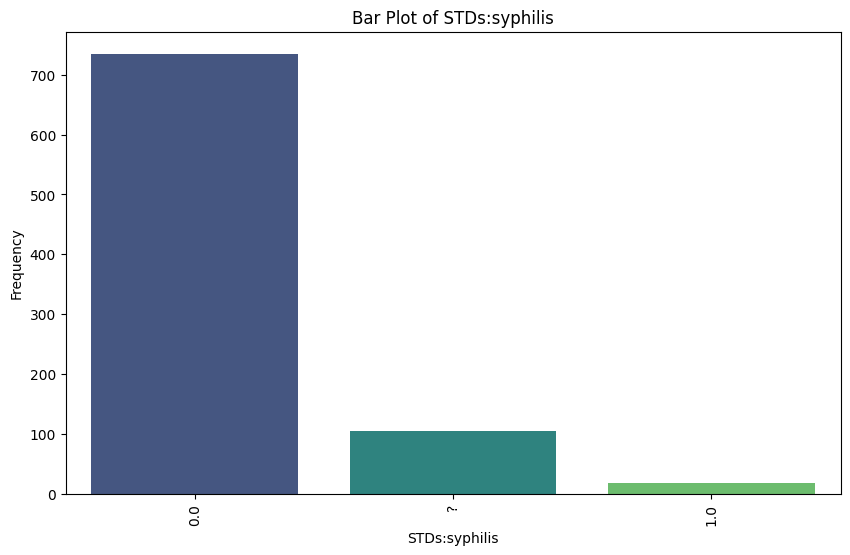

Frequency Table for STDs:pelvic inflammatory disease:
STDs:pelvic inflammatory disease
0.0    752
?      105
1.0      1
Name: count, dtype: int64

Proportion Table for STDs:pelvic inflammatory disease:
STDs:pelvic inflammatory disease
0.0    0.876457
?      0.122378
1.0    0.001166
Name: proportion, dtype: float64



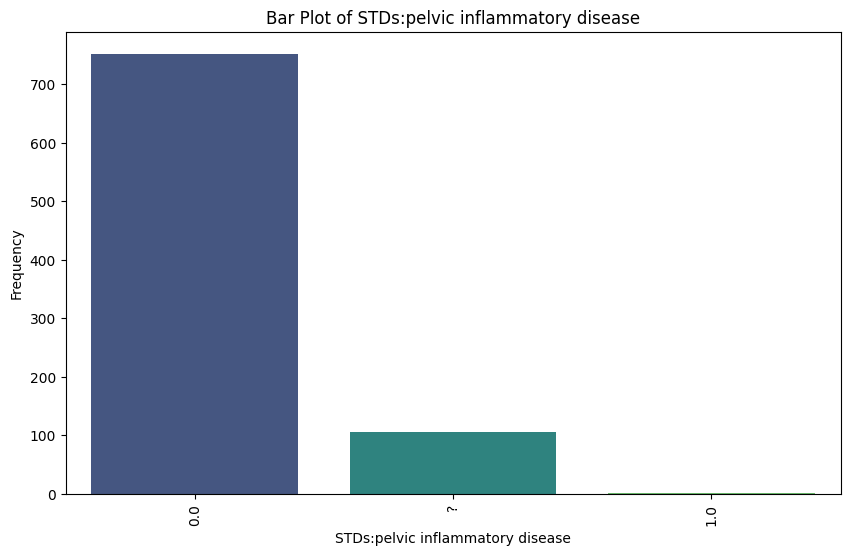

Frequency Table for STDs:genital herpes:
STDs:genital herpes
0.0    752
?      105
1.0      1
Name: count, dtype: int64

Proportion Table for STDs:genital herpes:
STDs:genital herpes
0.0    0.876457
?      0.122378
1.0    0.001166
Name: proportion, dtype: float64



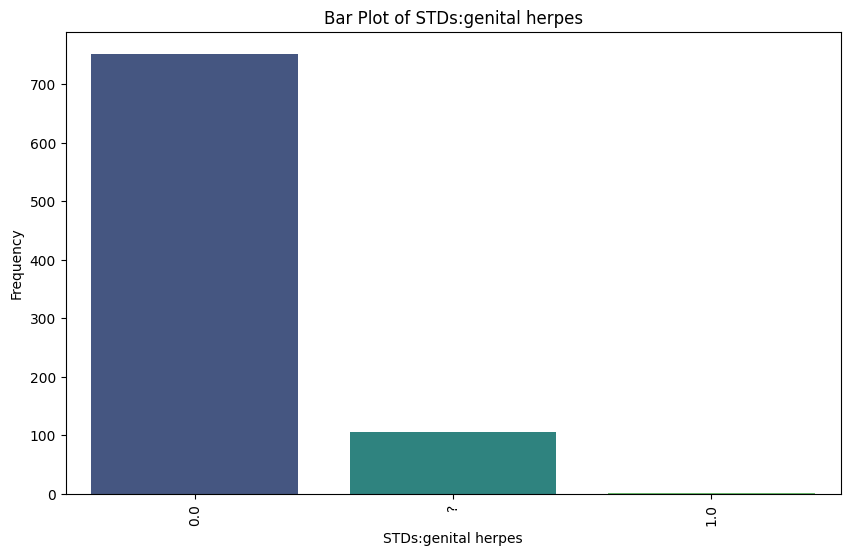

Frequency Table for STDs:molluscum contagiosum:
STDs:molluscum contagiosum
0.0    752
?      105
1.0      1
Name: count, dtype: int64

Proportion Table for STDs:molluscum contagiosum:
STDs:molluscum contagiosum
0.0    0.876457
?      0.122378
1.0    0.001166
Name: proportion, dtype: float64



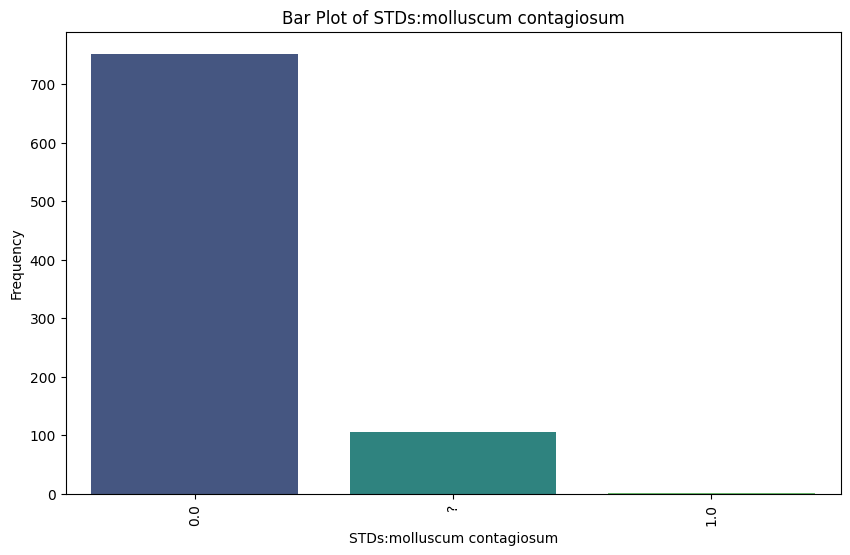

Frequency Table for STDs:AIDS:
STDs:AIDS
0.0    753
?      105
Name: count, dtype: int64

Proportion Table for STDs:AIDS:
STDs:AIDS
0.0    0.877622
?      0.122378
Name: proportion, dtype: float64



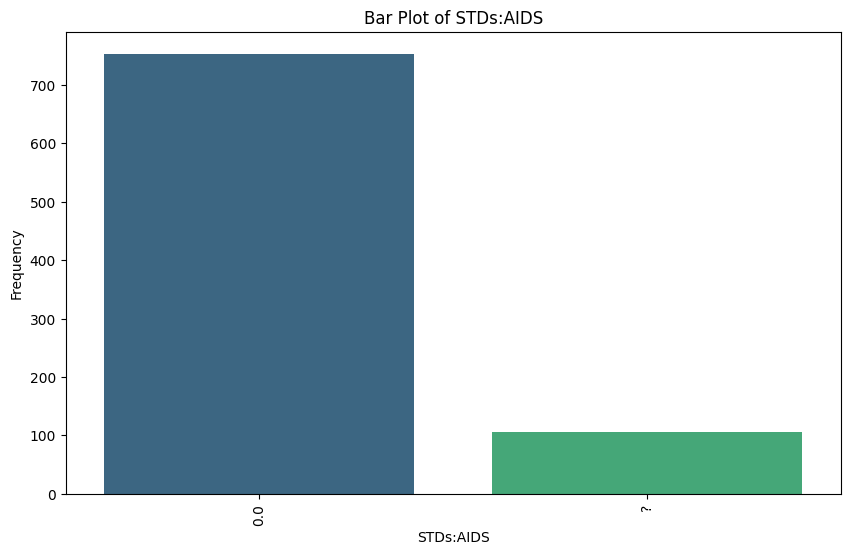

Frequency Table for STDs:HIV:
STDs:HIV
0.0    735
?      105
1.0     18
Name: count, dtype: int64

Proportion Table for STDs:HIV:
STDs:HIV
0.0    0.856643
?      0.122378
1.0    0.020979
Name: proportion, dtype: float64



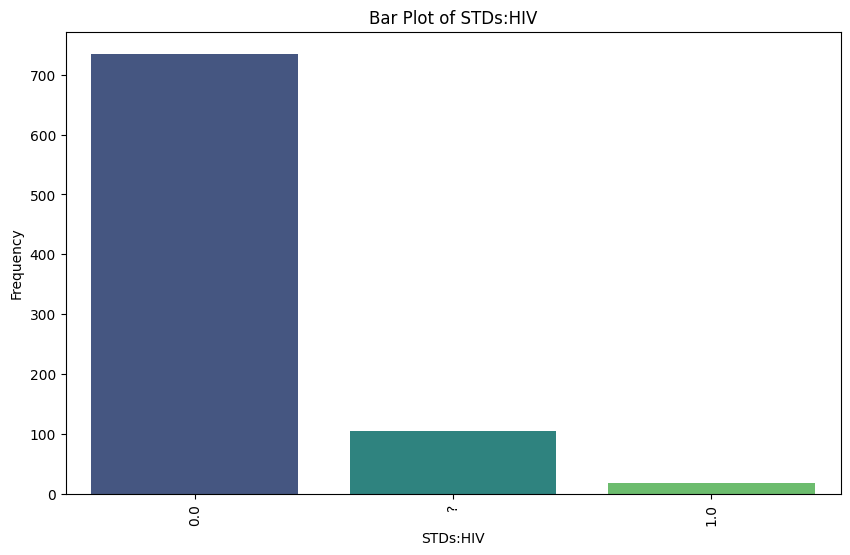

Frequency Table for STDs:Hepatitis B:
STDs:Hepatitis B
0.0    752
?      105
1.0      1
Name: count, dtype: int64

Proportion Table for STDs:Hepatitis B:
STDs:Hepatitis B
0.0    0.876457
?      0.122378
1.0    0.001166
Name: proportion, dtype: float64



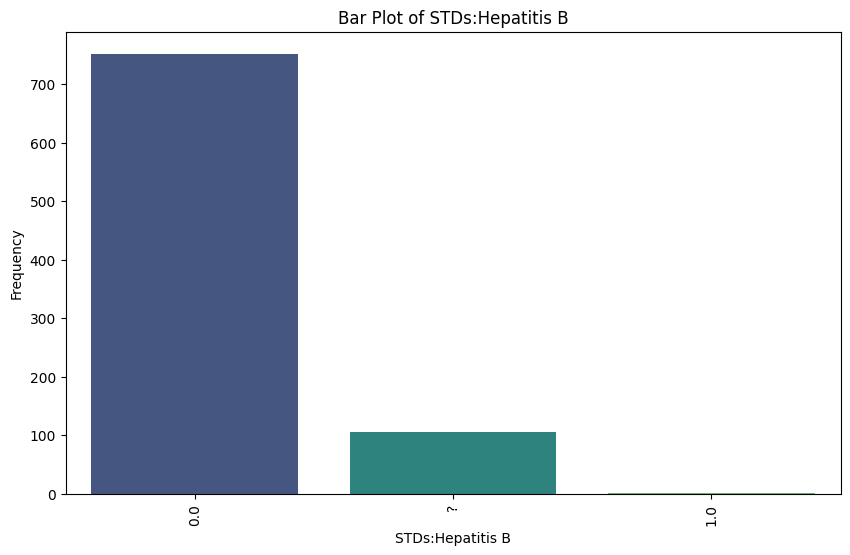

Frequency Table for STDs:HPV:
STDs:HPV
0.0    751
?      105
1.0      2
Name: count, dtype: int64

Proportion Table for STDs:HPV:
STDs:HPV
0.0    0.875291
?      0.122378
1.0    0.002331
Name: proportion, dtype: float64



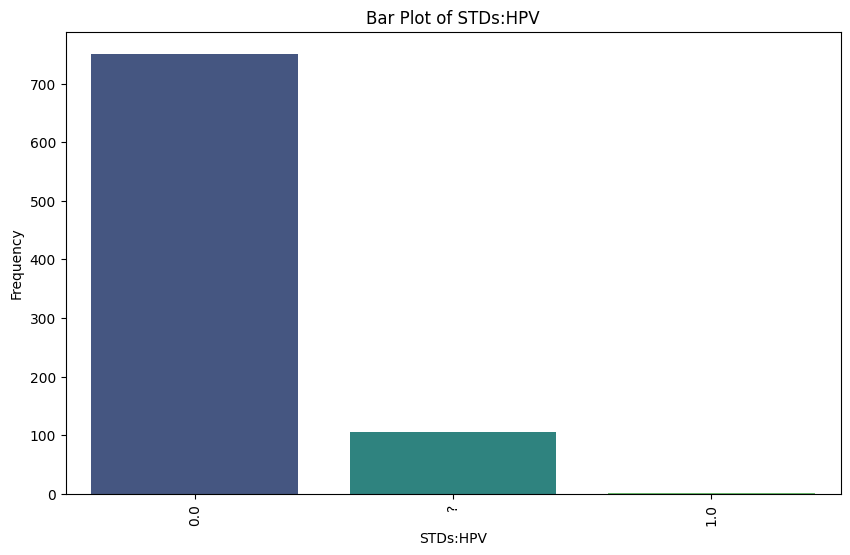

Frequency Table for Dx:Cancer:
Dx:Cancer
0    840
1     18
Name: count, dtype: int64

Proportion Table for Dx:Cancer:
Dx:Cancer
0    0.979021
1    0.020979
Name: proportion, dtype: float64



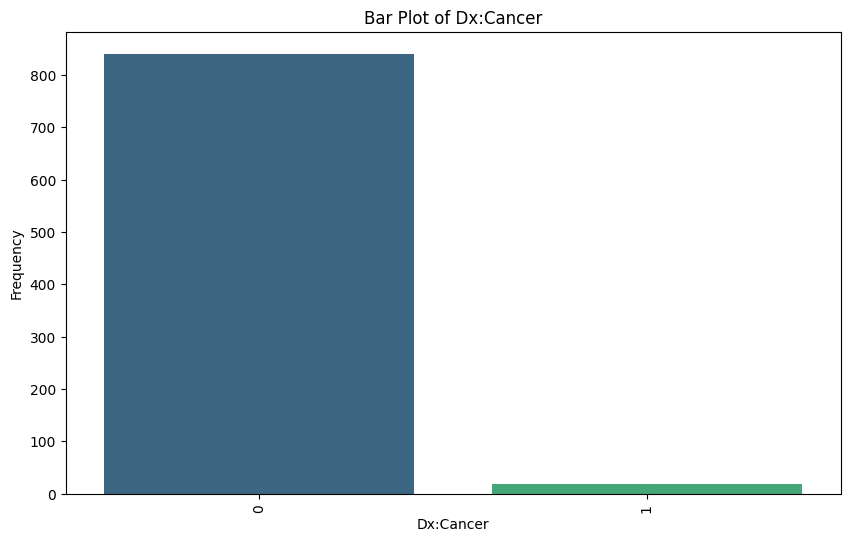

Frequency Table for Dx:CIN:
Dx:CIN
0    849
1      9
Name: count, dtype: int64

Proportion Table for Dx:CIN:
Dx:CIN
0    0.98951
1    0.01049
Name: proportion, dtype: float64



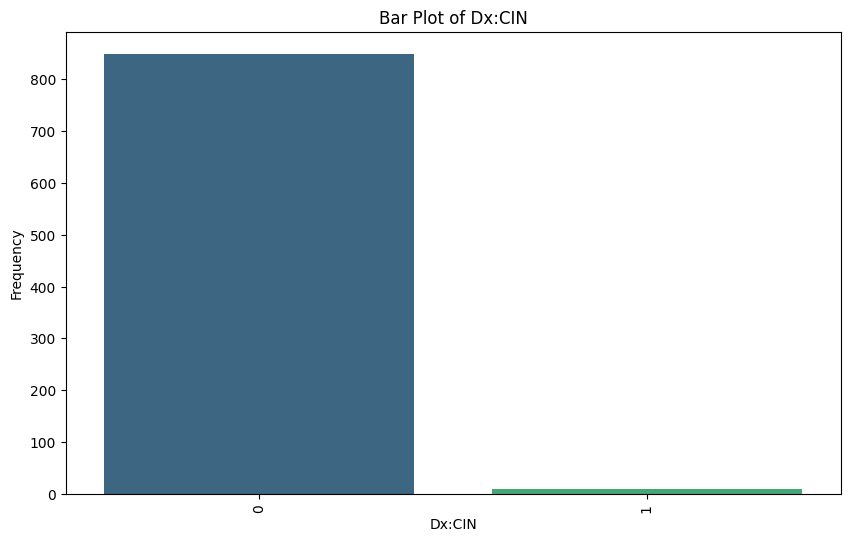

Frequency Table for Dx:HPV:
Dx:HPV
0    840
1     18
Name: count, dtype: int64

Proportion Table for Dx:HPV:
Dx:HPV
0    0.979021
1    0.020979
Name: proportion, dtype: float64



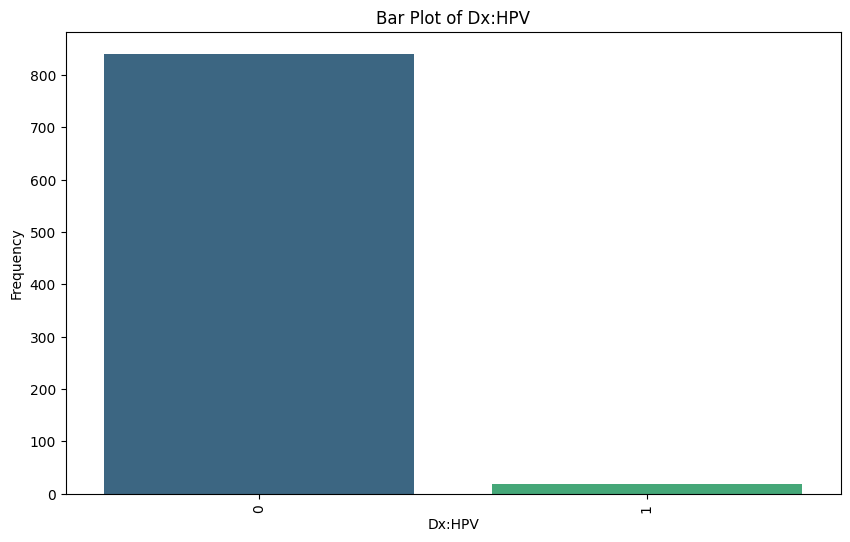

Frequency Table for Dx:
Dx
0    834
1     24
Name: count, dtype: int64

Proportion Table for Dx:
Dx
0    0.972028
1    0.027972
Name: proportion, dtype: float64



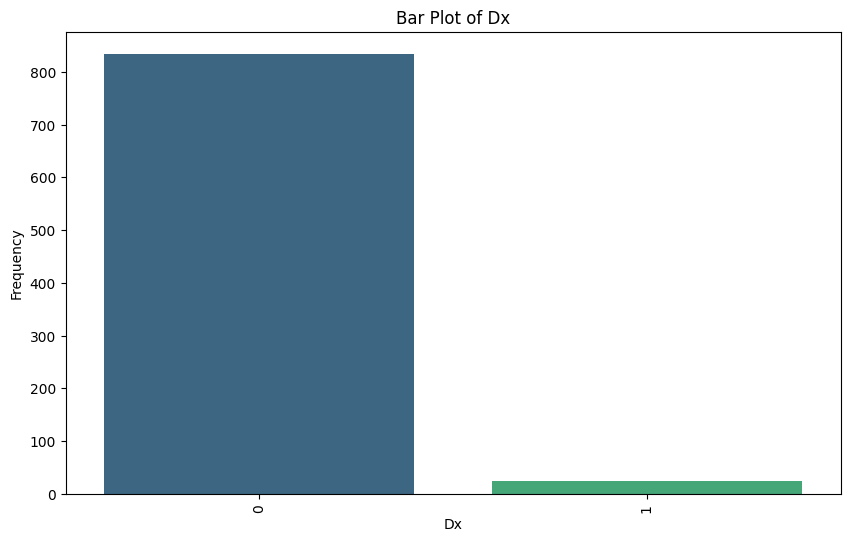

Frequency Table for Hinselmann:
Hinselmann
0    823
1     35
Name: count, dtype: int64

Proportion Table for Hinselmann:
Hinselmann
0    0.959207
1    0.040793
Name: proportion, dtype: float64



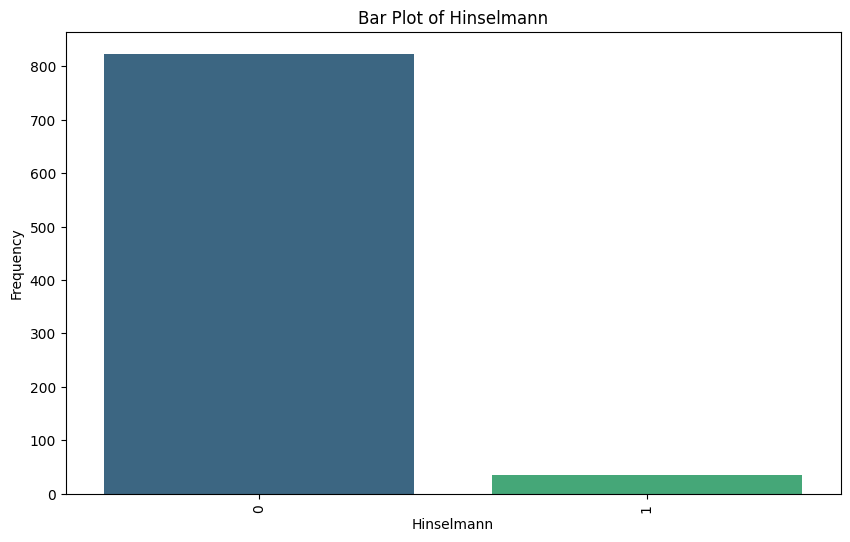

Frequency Table for Schiller:
Schiller
0    784
1     74
Name: count, dtype: int64

Proportion Table for Schiller:
Schiller
0    0.913753
1    0.086247
Name: proportion, dtype: float64



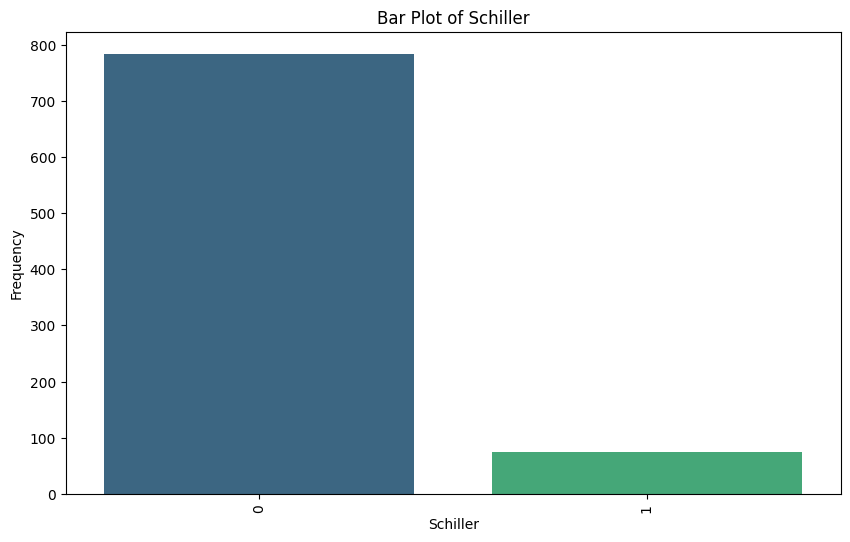

Frequency Table for Citology:
Citology
0    814
1     44
Name: count, dtype: int64

Proportion Table for Citology:
Citology
0    0.948718
1    0.051282
Name: proportion, dtype: float64



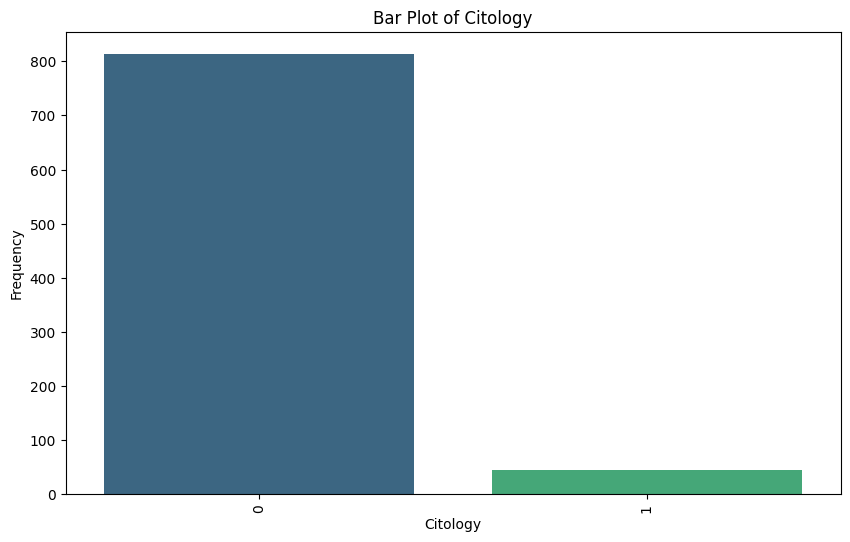

Frequency Table for Biopsy:
Biopsy
0    803
1     55
Name: count, dtype: int64

Proportion Table for Biopsy:
Biopsy
0    0.935897
1    0.064103
Name: proportion, dtype: float64



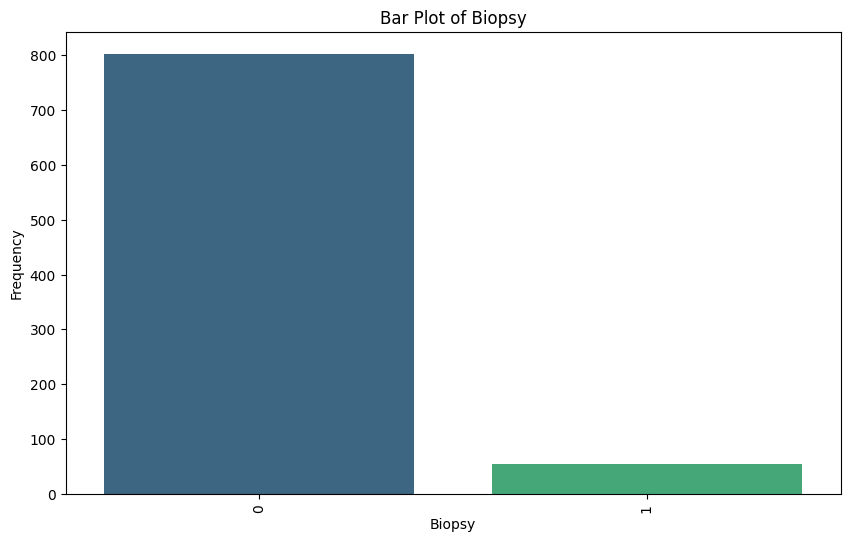

In [28]:
#Analizar variables categóricas
analyzeCategoricalVars(datos, categoricalVars)


# 6. Determine el comportamiento a seguir con los valores faltantes. Explique si necesita remover alguna variable por la cantidad de valores faltantes que tiene. ¿Es factible eliminar todos los valores faltantes de todas las variables?

In [31]:
#Calcular la cantidad de valores faltantes por variable
missingValues = datos.isnull().sum()
missingPercentage = (missingValues / len(datos)) * 100

#Mostrar el porcentaje de valores faltantes por variable
missingData = pd.DataFrame({'Missing Values': missingValues, 'Percentage': missingPercentage})
missingData = missingData.sort_values(by='Percentage', ascending=False)
print(missingData)

                                    Missing Values  Percentage
STDs: Time since first diagnosis               787   91.724942
STDs: Time since last diagnosis                787   91.724942
IUD (years)                                    117   13.636364
Hormonal Contraceptives (years)                108   12.587413
STDs (number)                                  105   12.237762
Num of pregnancies                              56    6.526807
Number of sexual partners                       26    3.030303
Smokes (years)                                  13    1.515152
Smokes (packs/year)                             13    1.515152
First sexual intercourse                         7    0.815851
Age                                              0    0.000000
Dx:Cancer                                        0    0.000000
STDs:HPV                                         0    0.000000
STDs: Number of diagnosis                        0    0.000000
Dx                                               0    0

In [32]:
#Evaluar la eliminación de variables con muchos valores faltantes
threshold = 20 
variablesToDrop = missingData[missingData['Percentage'] > threshold].index.tolist()
print(f'Variables a eliminar por superar el {threshold}% de valores faltantes: {variablesToDrop}')

#Eliminar variables con demasiados valores faltantes
dataCleaned = datos.drop(columns=variablesToDrop)

#Verificar la cantidad de valores faltantes en el dataset limpio
missingValuesCleaned = dataCleaned.isnull().sum()
missingPercentageCleaned = (missingValuesCleaned / len(dataCleaned)) * 100
print(pd.DataFrame({'Missing Values': missingValuesCleaned, 'Percentage': missingPercentageCleaned}))

#Eliminar filas con valores faltantes
dataFinal = dataCleaned.dropna()

#Mostrar la cantidad de datos eliminados
print(f'Datos originales: {len(datos)}')
print(f'Datos después de eliminar filas con valores faltantes: {len(dataFinal)}')

#Mostrar el dataframe final sin valores faltantes
dataFinal.head()


Variables a eliminar por superar el 20% de valores faltantes: ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis']
                                    Missing Values  Percentage
Age                                              0    0.000000
Number of sexual partners                       26    3.030303
First sexual intercourse                         7    0.815851
Num of pregnancies                              56    6.526807
Smokes                                           0    0.000000
Smokes (years)                                  13    1.515152
Smokes (packs/year)                             13    1.515152
Hormonal Contraceptives                          0    0.000000
Hormonal Contraceptives (years)                108   12.587413
IUD                                              0    0.000000
IUD (years)                                    117   13.636364
STDs                                             0    0.000000
STDs (number)                                  

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
3,52.0,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0.0,1,0,1,0,0,0,0,0
4,46.0,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0
5,42.0,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,0,0,0,0


## ¿Es factible eliminar todos los valores faltantes de todas las variables?
Datos originales: 
* Número total de filas: 858

Datos después de eliminar filas con valores faltantes: 
* Número total de filas: 668

Por lo que, eliminar las filas con valores faltantes **sí** es factible, pues todavía quedan suficientes datos para el análisis posterior (668 filas).

# 7. Estudie si es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA, ¿valdrá la pena?

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [47]:
#Codificación de variables categóricas
dataEncoded = pd.get_dummies(dataCleaned, columns=categoricalVars, drop_first=True)

#Normalización de todas las variables
scaler = StandardScaler()
dataScaled = scaler.fit_transform(dataEncoded)

#Aplicación de PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pcaResult = pca.fit_transform(dataScaled)


Varianza explicada por las dos primeras componentes principales: [0.31071691 0.09922476]


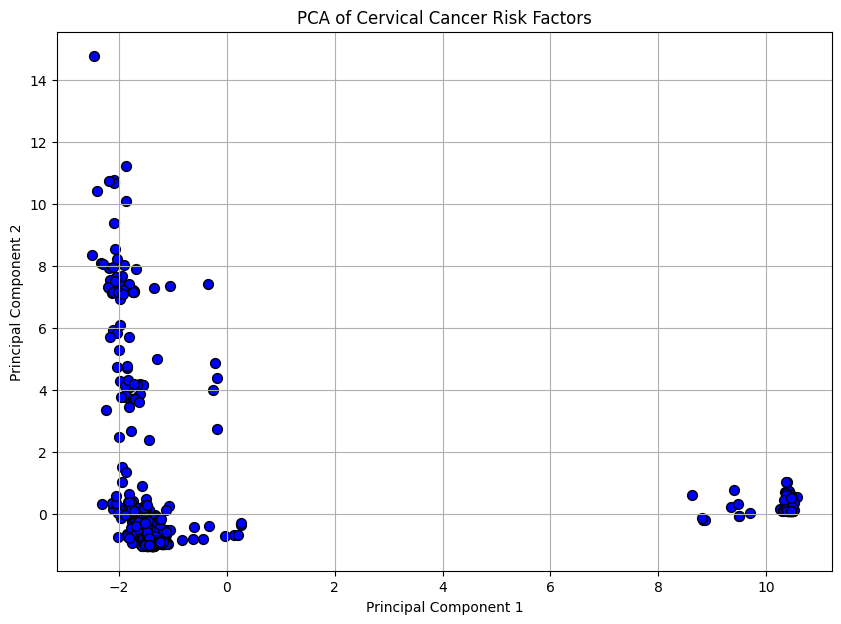

In [48]:
#Mostrar los resultados del PCA
explainedVariance = pca.explained_variance_ratio_
print(f'Varianza explicada por las dos primeras componentes principales: {explainedVariance}')

#Código para visualizar el PCA
plt.figure(figsize=(10, 7))
plt.scatter(pcaResult[:, 0], pcaResult[:, 1], c='blue', edgecolor='k', s=50)
plt.title('PCA of Cervical Cancer Risk Factors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

## ¿Es posible hacer transformaciones en las variables categóricas para incluirlas en el PCA? ¿Vale la pena?

Sí, es posible transformar las variables categóricas mediante codificación (por ejemplo, One-Hot Encoding) para incluirlas en un PCA.

Por otro lado, incluir las variables categóricas puede ser valioso, ya que permite capturar más información y variabilidad de los datos. Sin embargo, es importante normalizar los datos antes de aplicar PCA y evaluar cuántos componentes principales se retienen.